## 4.1 Landau level wave functions and probability density (square of the ewave function)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
from typing import Callable

1. Write a ....

In [15]:
hbar = 6.582e-16
e = 1.6e-19

B = 1  # Arbitrary value

m = 9.1e-31
wc = e * B / m

beta = m * wc / hbar  # TODO: From where do we take these values?


def exponential(zeta: float) -> float:
    return math.exp(- (zeta ** 2) / (2 * beta))


# zeta = beta * x
def wave_function0(zeta: float) -> float:
    return math.pow(beta / math.pi, 0.25) * exponential(zeta) 


# zeta = beta * x
def wave_function1(zeta: float) -> float:
    return math.pow(4 / (math.pi * beta ** 2), 0.25) * exponential(zeta) * zeta


In [16]:
cache = {0: wave_function0, 1: wave_function1}

def wave_function(n, zeta) -> Callable[[float], float]:

    if cache.get(n, None) is not None:
        return cache.get(n)(zeta)

    cache[n] = lambda zeta_: math.sqrt(2 / n) * (zeta_ * wave_function(n-1, zeta_) -  math.sqrt((n - 1) / 2) * wave_function(n-2, zeta_))

    return cache[n](zeta)

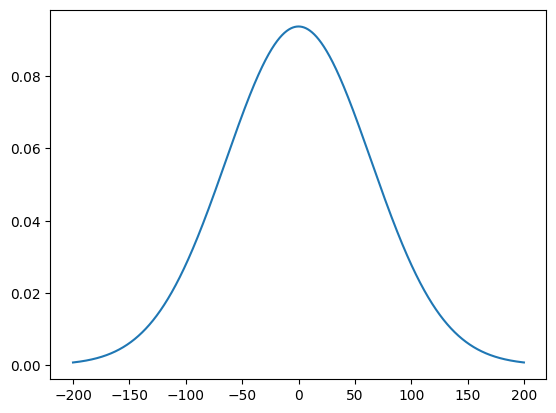

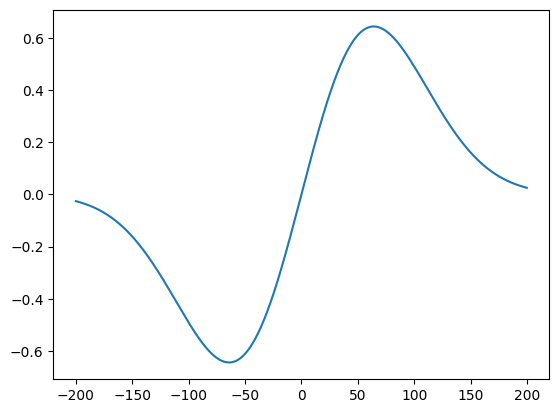

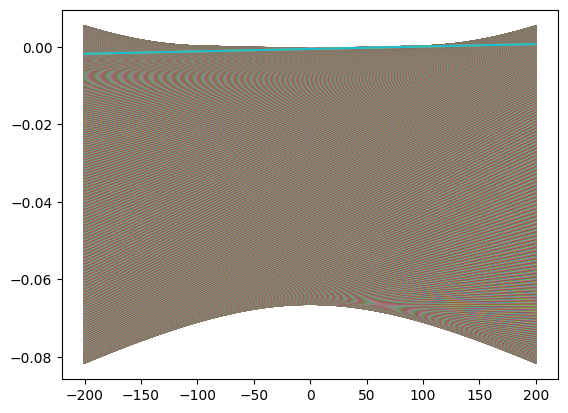

KeyboardInterrupt: 

In [17]:
x_ = np.arange(-200, 200, 0.1)

def zeta(x):
    return beta * x


arr_wave_function0 = np.array(tuple(wave_function0(zeta(xi)) for xi in x_))
arr_wave_function1 = np.array(tuple(wave_function1(zeta(xi)) for xi in x_))


cache = {0: arr_wave_function0, 1: arr_wave_function1}
def wave_function(n) -> np.ndarray[float]:

    if cache.get(n, None) is not None:
        return cache.get(n)

    wave_function_n = lambda zeta_: math.sqrt(2 / n) * (zeta_ * cache[n-1] -  math.sqrt((n - 1) / 2) * cache[n-2])

    cache[n] = np.array(tuple(wave_function_n(zeta(xi)) for xi in x_))

    return cache[n]



for n in range(20):

    plt.plot(x_, wave_function(n), label=f'Stuff {n}')
    # plt.legend()
    plt.show()



In [ ]:
x_ = np.arange(-200, 200, 0.1)

def zeta(x):
    return beta * x


for idx in range(50):

    plt.plot(x_, tuple(wave_function(idx, zeta(xi)) for xi in x_), label=f'Stuff {idx}')
    plt.legend()
    plt.show()


# plt.plot(x_, tuple(wave_function(0, zeta(xi)) for xi in x_), label=f'Stuff 0')
# plt.legend()
# plt.show()
# plt.plot(x_, tuple(wave_function(1, zeta(xi)) for xi in x_), label=f'Stuff 1')
# plt.legend()
# plt.show()
# plt.plot(x_, tuple(wave_function(18, zeta(xi)) for xi in x_), label=f'Stuff 18')
# # plt.plot(x_, tuple(wave_function(50, zeta(xi)) for xi in x_), label=f'Stuff 50')
# # plt.plot(x_, tuple(wave_function(100, zeta(xi)) for xi in x_), label=f'Stuff 100')
# plt.legend()
# plt.show()